In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [41]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
pat3 = r'pic\.twitter\.com/[^\s]+'
combined_pat = r'|'.join((pat1, pat2, pat3))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [2]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [3]:
import codecs
import unidecode
import re
import spacy
nlp = spacy.load('en')

def spacy_cleaner(text):
    try:
        decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
    except:
        decoded = unidecode.unidecode(text)
    apostrophe_handled = re.sub("’", "'", decoded)
    expanded = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
    parsed = nlp(expanded)
    final_tokens = []
    for t in parsed:
        if t.is_punct or t.is_space or t.like_num or t.like_url or str(t).startswith('@'):
            pass
        else:
            if t.lemma_ == '-PRON-':
                final_tokens.append(str(t))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(t.lemma_))
                if len(sc_removed) > 1:
                    final_tokens.append(sc_removed)
    joined = ' '.join(final_tokens)
    spell_corrected = re.sub(r'(.)\1+', r'\1\1', joined)
    return spell_corrected

In [4]:
df = pd.read_csv("../datasets/combined/data/all_tweets/tweets1.csv",#header=None,
                 usecols=[4,7])#,names=['text','category'])
#df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
df.head()

text        category
0  people will give #panamaVerdict in NA_120 elec...  panama_verdict
1  U r just a barking dog. Where did Panama expos...  panama_verdict
2  It is clear from Maryam Nawaz's bitter NA-120 ...  panama_verdict
3  NAB References triggered by Panama verdict are...  panama_verdict
4  Jaise motu gang k saath hua tha, he didn't acc...  panama_verdict

In [5]:
df = df.drop_duplicates('text')
print(df.shape)

(794353, 2)


In [6]:
df = df[(df.text.map(len) > 10)]# & (df.text.map(len) <= 150)]
df.reset_index(inplace=True, drop=True)

print(df.shape)

(794296, 2)


In [7]:
nums = [0,200000,400000,600000,794296]

In [19]:
print(len(clean_tweet_texts))

200001


In [ ]:
%%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(df)):
    if( (i+1)%100000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, len(df) ))                                                                    
    clean_tweet_texts.append(spacy_cleaner(df['text'][i]))

Cleaning the tweets...

Tweets 100000 of 966201 has been processed
Tweets 200000 of 966201 has been processed
Tweets 300000 of 966201 has been processed
Tweets 400000 of 966201 has been processed


In [ ]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.category
clean_df.to_csv('../datasets/combined/data/filtered_tweets/clean_tweets.csv',encoding='utf-8',index=False)

In [46]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966201 entries, 0 to 966200
Data columns (total 2 columns):
text      965236 non-null object
target    966201 non-null object
dtypes: object(2)
memory usage: 14.7+ MB


In [47]:
my_df[my_df.isnull().any(axis=1)].head()

text          target
1088  NaN  panama_verdict
1089  NaN  panama_verdict
1094  NaN  panama_verdict
2498  NaN  panama_verdict
9685  NaN  panama_verdict

In [48]:
np.sum(my_df.isnull().any(axis=1))

965

In [49]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

It seems like 965 entries have null entries for the text column. This is strange, because the original dataset had no null entries, and if there are any null entries in the cleaned dataset,
it must have happened during the cleaning process.

In [50]:
df = pd.read_csv("../datasets/combined/data/all_tweets/tweets1.csv")#,header=None)
df.iloc[my_df[my_df.isnull().any(axis=1)].index,:].head()

/home/alizeb/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  Unnamed: 0.1            id              created  \
1088        1088          1088  8.974179e+17  2017-08-15T11:21:24   
1089        1089          1089  8.974179e+17  2017-08-15T11:21:17   
1094        1094          1094  8.974169e+17  2017-08-15T11:17:18   
2498        2498          2498  8.934884e+17  2017-08-04T15:06:52   
9685        9685          9685  8.550548e+17  2017-04-20T13:45:26   

                                                   text       username  \
1088  ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...  UrduGEONewsTv   
1089  ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...  UrduPtvSports   
1094  ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...      arynewsud   
2498  https://twitter.com/ImranKhanPTI/status/893486...     entropy664   
9685  ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...  ExpressNewsPK   

                   name        category lang retweets likes  replies  
1088   #Urdu #GEO #NEWS  panama_verdict   en        0     0      0.0  
1089  #PTV #ESPN #SCORE  panama_verdict   en        0     0      0.0  
1094      ARY News Urdu  panama_verdict   en        0     7      0.0  
2498          MaxPlanck  panama_verdict   en        0     0      0.0  
9685       Express News  panama_verdict   en       15    52      0.0

In [18]:
csv = '../datasets/combined/data/filtered_tweets/clean_tweets.csv'
data = pd.read_csv(csv)#, header=None)#,index_col=0)
data.head()

text          target
0  people will give panamaverdict in na electionw...  panama_verdict
1  just bark dog where do panama expose corruptio...  panama_verdict
2  It be clear from maryam nawaz bitter na campai...  panama_verdict
3  nab references trigger by panama verdict be ha...  panama_verdict
4  jaise motu gang saath hua tha he do not accept...  panama_verdict

In [19]:
data = data.drop_duplicates('text')
print(data.shape)

(362497, 2)


In [20]:
data = data[~data['text'].str.contains('eskom')]
data = data[~data['text'].str.contains('nepal')]
data = data[~data['text'].str.contains('africa')]
data = data[~data['text'].str.contains('delhi')]
data = data[~data['text'].str.contains('reminder')]
data = data[~data['text'].str.contains('zemco')]
data = data[~data['text'].str.contains('kerala')]
data = data[~data['text'].str.contains('lanka')]
data = data[~data['text'].str.contains('kejriwal')]
data = data[~data['text'].str.contains('bjp')]

print(data.shape)

TypeError: bad operand type for unary ~: 'float'

In [ ]:
data = data[(data.text.map(len) > 1) & (data.text.map(len) <= 150)]
data.reset_index(inplace=True, drop=True)

print(data.shape)

In [ ]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)
data.info()

In [ ]:
data.to_csv('datasets/combined/data/filtered_tweets/filtered_tweets.csv', index=False)

In [3]:
csv = '../datasets/combined/data/sentiment/num_label_tweets.csv'
my_df = pd.read_csv(csv)#, header=None)#,index_col=0)
my_df.head()
#print(len(my_df))

text        category  \
0  people will give panamaverdict in na electionw...  panama_verdict   
1  just bark dog where do panama expose corruptio...  panama_verdict   
2  It be clear from maryam nawaz bitter na campai...  panama_verdict   
3  nab references trigger by panama verdict be ha...  panama_verdict   
4  jaise motu gang saath hua tha he do not accept...  panama_verdict   

   sentiment  
0          1  
1          2  
2          1  
3          0  
4          2

# Word Cloud

In [52]:
loadshedding_tweets = my_df[my_df.target == 'loadshedding']
loadshedding_string = []
for t in loadshedding_tweets.text:
    loadshedding_string.append(t)
loadshedding_string = pd.Series(loadshedding_string).str.cat(sep=' ')

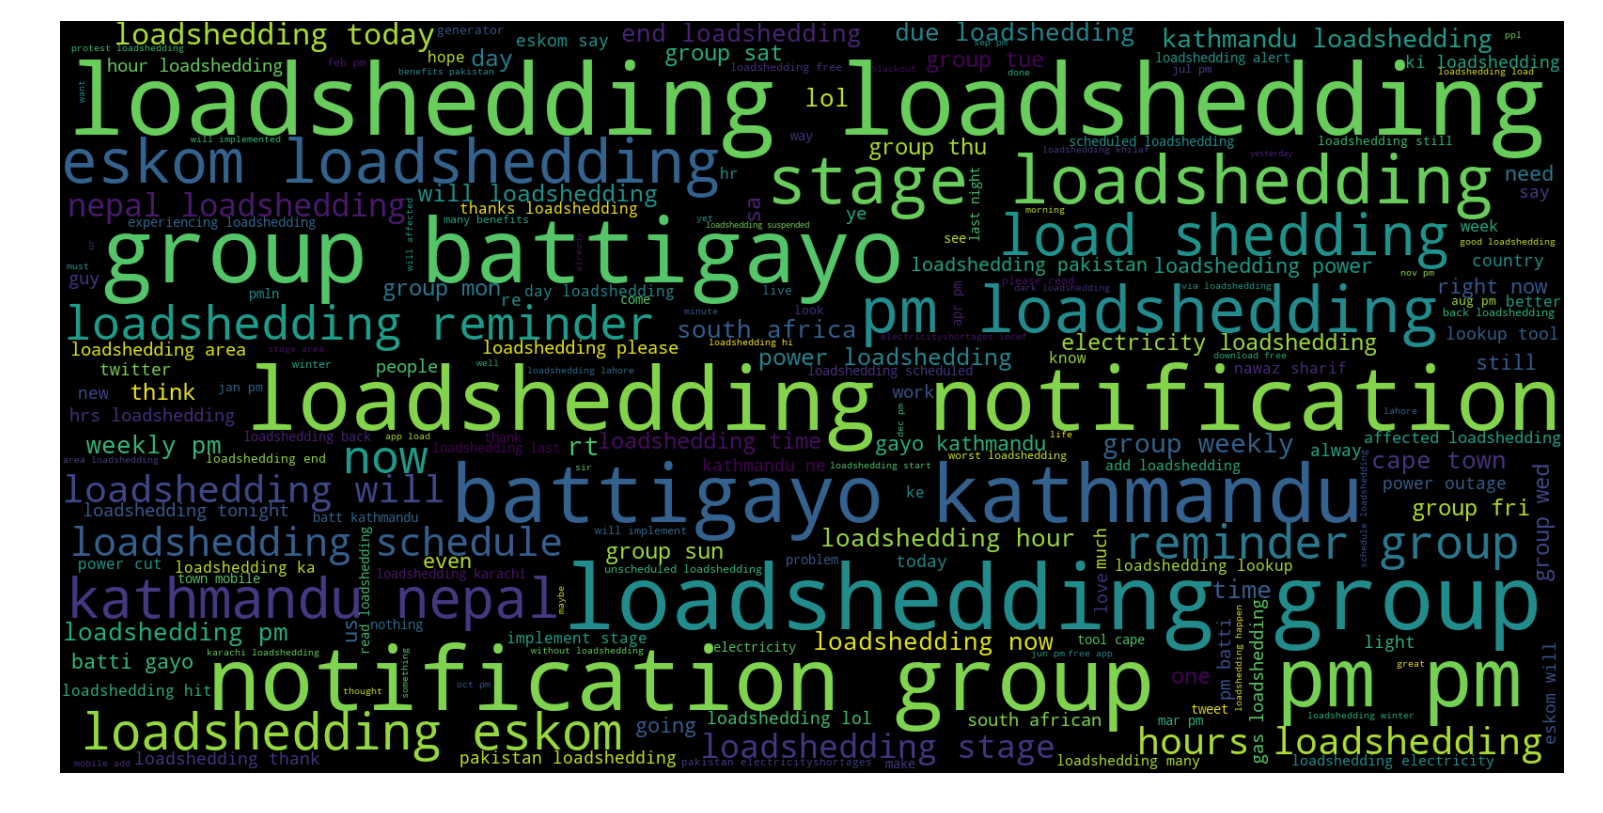

In [53]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(loadshedding_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
for t in loadshedding_tweets.text[:200]:
    if 'sharif' in t:
        print(t)

loadshedding ne logoun ki mat mar dee hey aur nawazsharif ki imrankhan ney


In [54]:
panama_tweets = my_df[my_df.target == 'panama_papers']
panama_string = []
for t in panama_tweets.text:
    panama_string.append(t)
panama_string = pd.Series(panama_string).str.cat(sep=' ')

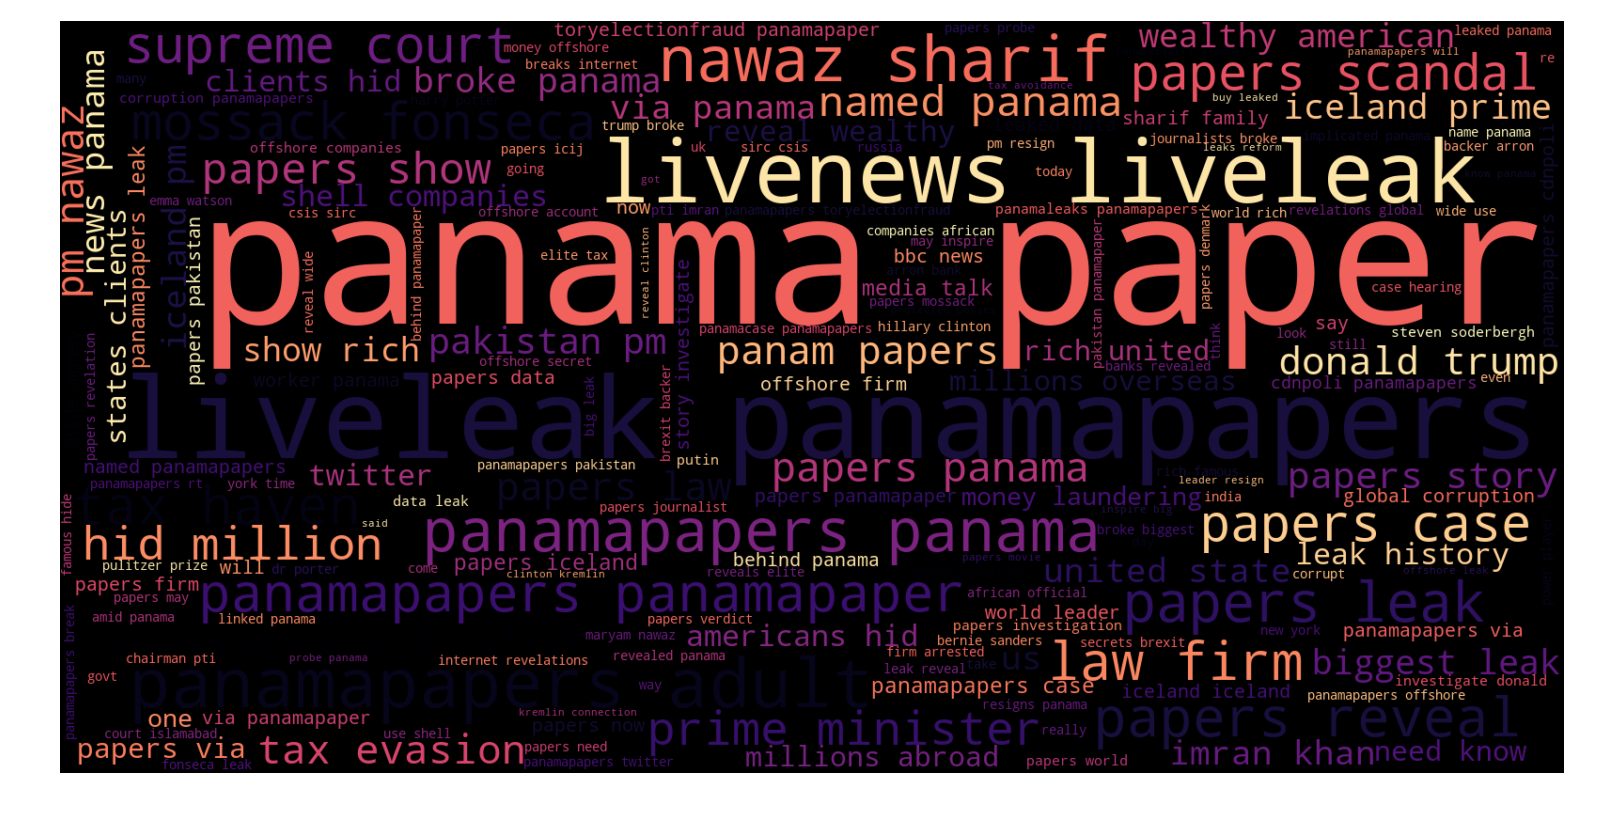

In [55]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(panama_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [56]:
verdict_tweets = my_df[my_df.target == 'panama_verdict']
verdict_string = []
for t in verdict_tweets.text:
    verdict_string.append(t)
verdict_string = pd.Series(verdict_string).str.cat(sep=' ')

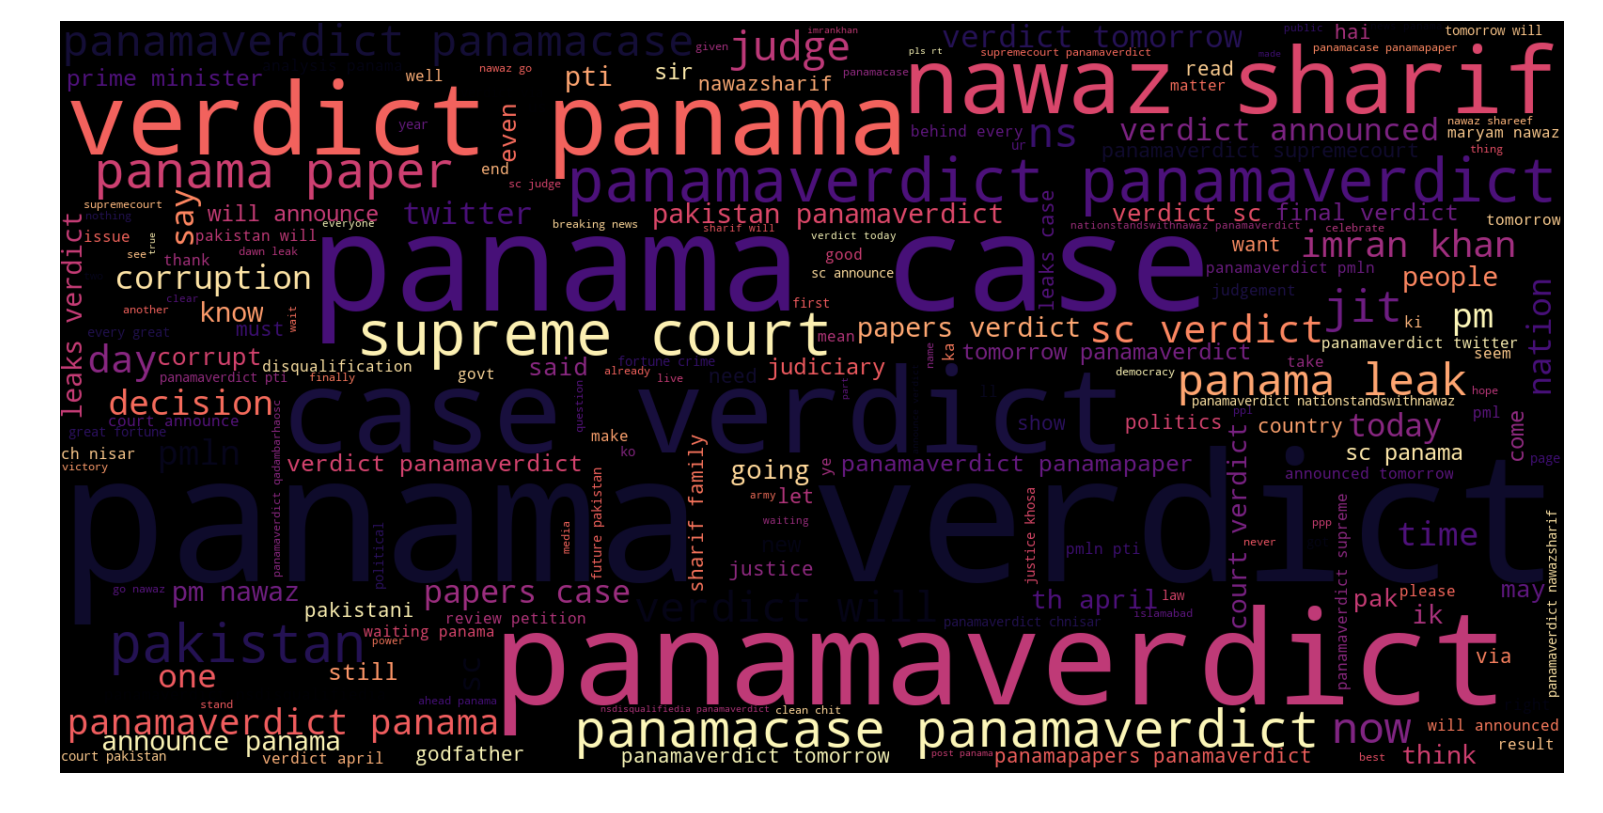

In [57]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(verdict_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [59]:
cpec_tweets = my_df[my_df.target == 'cpec']
cpec_string = []
for t in cpec_tweets.text:
    cpec_string.append(t)
cpec_string = pd.Series(cpec_string).str.cat(sep=' ')

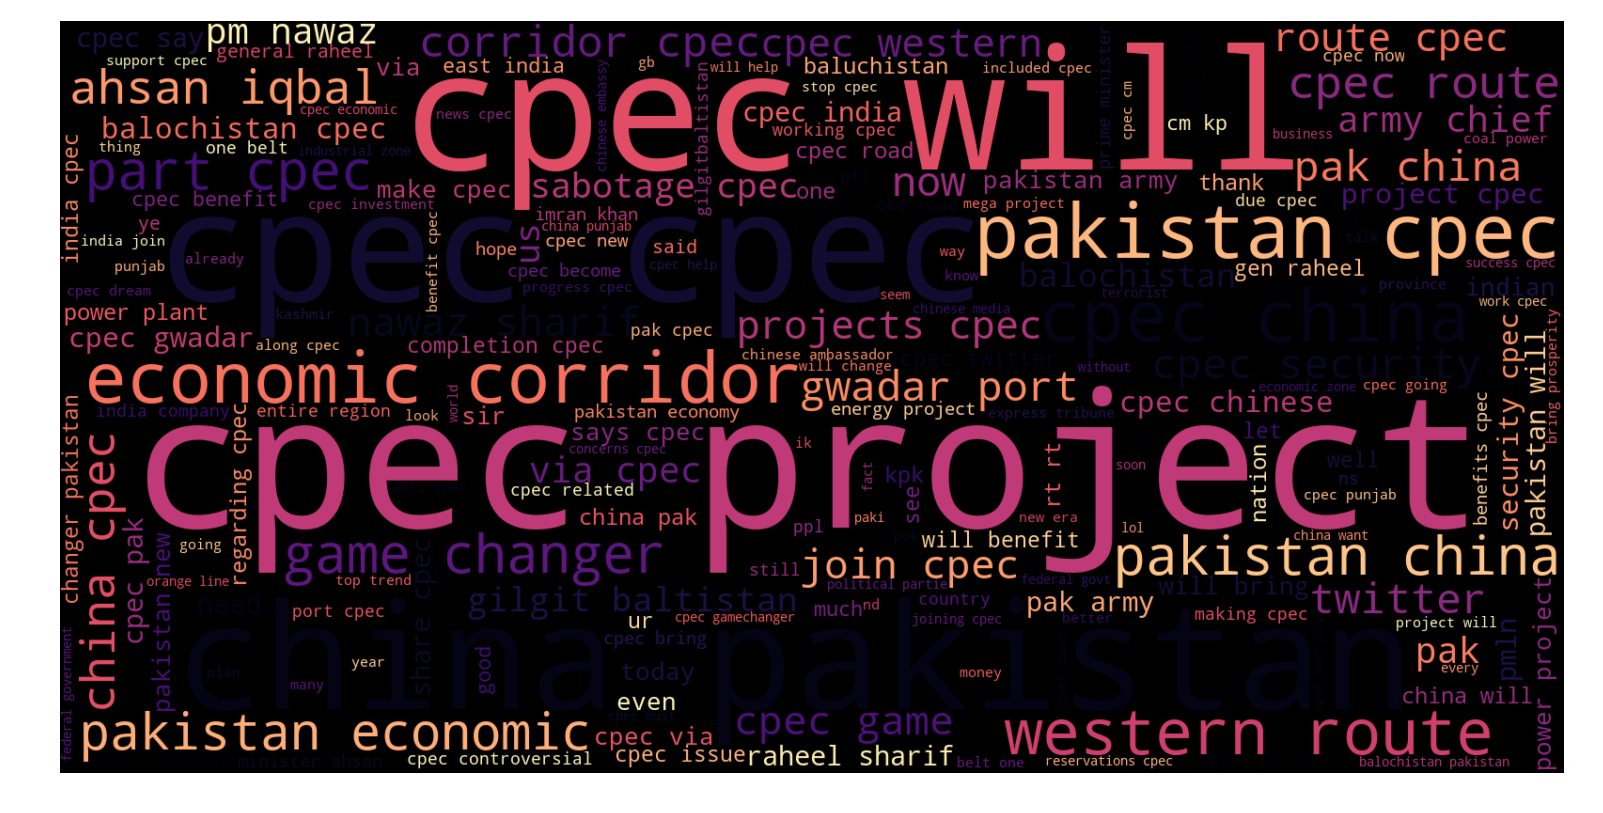

In [60]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(cpec_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [63]:
dengue_tweets = my_df[my_df.target == 'dengue']
dengue_string = []
for t in dengue_tweets.text:
    dengue_string.append(t)
dengue_string = pd.Series(dengue_string).str.cat(sep=' ')

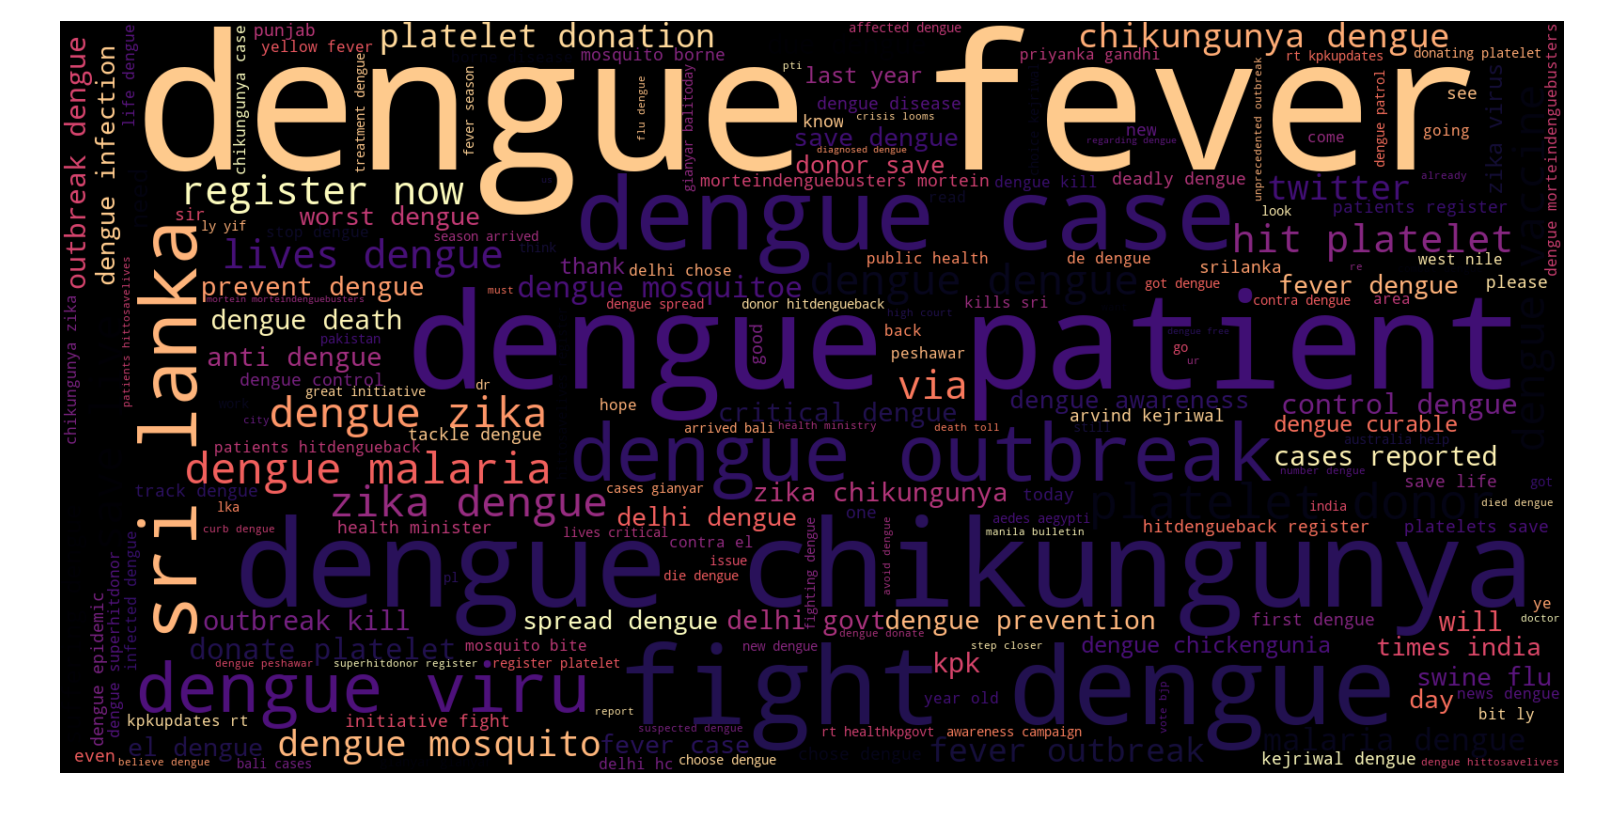

In [64]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(dengue_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
del pos_tweets, pos_string, neg_tweets, neg_string, wordcloud, df

## Preparation for data visualisation

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [5]:
len(cvec.get_feature_names())

355911

OK it looks like count vectorizer has extracted 264936 words out of the corpus.

In [7]:
pos_doc_matrix = cvec.transform(my_df[my_df.sentiment == 1].text)
neg_doc_matrix = cvec.transform(my_df[my_df.sentiment == 0].text)
neu_doc_matrix = cvec.transform(my_df[my_df.sentiment == 2].text)
#cpec_doc_matrix = cvec.transform(my_df[my_df.target == 'cpec'].text)
#dengue_doc_matrix = cvec.transform(my_df[my_df.target == 'dengue'].text)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg_tf = np.sum(neg_doc_matrix,axis=0)
neu_tf = np.sum(neu_doc_matrix,axis=0)
#cpec_tf = np.sum(cpec_doc_matrix,axis=0)
#dengue_tf = np.sum(dengue_doc_matrix,axis=0)
positive = np.squeeze(np.asarray(pos_tf))
negative = np.squeeze(np.asarray(neg_tf))
neutral = np.squeeze(np.asarray(neu_tf))
#cpec = np.squeeze(np.asarray(cpec_tf))
#dengue = np.squeeze(np.asarray(dengue_tf))
term_freq_df = pd.DataFrame([positive,negative,neutral],columns=cvec.get_feature_names()).transpose()

In [8]:
term_freq_df.head()

0      1       2
aa        37474  22078  126839
aab           8      1      11
aaba          0      1       1
aabaac        0      0       1
aabaaoum      0      0       1

-------------------------------------------------------------------------------------------------------

In [9]:
document_matrix = cvec.transform(my_df.text)

In [10]:
my_df[my_df.sentiment == 0].tail()

text category  sentiment
660628  deeply saddened to hear that kartika be suffer...   dengue          0
660630  shame today in pti slavery hide die dengue pat...   dengue          0
660632  take note immunity to repeat zika infection wi...   dengue          0
660639  try to re invent the wheel be wasteful time co...   dengue          0
660641  late update from dengue response unit khyber p...   dengue          0

In [45]:
%%time
neg_batches = np.linspace(0,798179,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print neg_batches[i+1],"entries' term freuquency calculated"
    i += 1

8062 entries' term freuquency calculated
88686 entries' term freuquency calculated
169310 entries' term freuquency calculated
249934 entries' term freuquency calculated
330558 entries' term freuquency calculated
411183 entries' term freuquency calculated
491807 entries' term freuquency calculated
572431 entries' term freuquency calculated
653055 entries' term freuquency calculated
733679 entries' term freuquency calculated
798179 entries' term freuquency calculated
CPU times: user 8min 17s, sys: 10min 54s, total: 19min 12s
Wall time: 20min 48s


In [11]:
my_df.tail()

text category  sentiment
660640  stay alert fight dengue install rk ecran fine ...   dengue          2
660641  late update from dengue response unit khyber p...   dengue          0
660642  aap govt have put in special effort in the spr...   dengue          1
660643  dru report say healthkp that ppl dengue test b...   dengue          1
660644  these be the big health risk texans face in th...   dengue          2

In [47]:
%%time
pos_batches = np.linspace(798179,1596019,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print pos_batches[i+1],"entries' term freuquency calculated"
    i += 1

806237 entries' term freuquency calculated
886827 entries' term freuquency calculated
967417 entries' term freuquency calculated
1048007 entries' term freuquency calculated
1128597 entries' term freuquency calculated
1209187 entries' term freuquency calculated
1289777 entries' term freuquency calculated
1370367 entries' term freuquency calculated
1450957 entries' term freuquency calculated
1531547 entries' term freuquency calculated
1596019 entries' term freuquency calculated
CPU times: user 8min 20s, sys: 11min 14s, total: 19min 35s
Wall time: 21min 43s


In [13]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
neu = np.sum(neu_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

ValueError: Must pass 2-d input

In [17]:
term_freq_df.columns = ['positive', 'negative','neutral']
term_freq_df['total'] = term_freq_df['positive'] + term_freq_df['negative'] + term_freq_df['neutral']# + term_freq_df['cpec'] + term_freq_df['dengue']
term_freq_df.sort_values(by='total', ascending=False).iloc[:20]

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [18]:
len(term_freq_df)

355911

In [20]:
term_freq_df.to_csv('../datasets/combined/data/sentiment/term_freq_df.csv',encoding='utf-8')

Text(0.5,1,'Top 500 tokens in tweets')

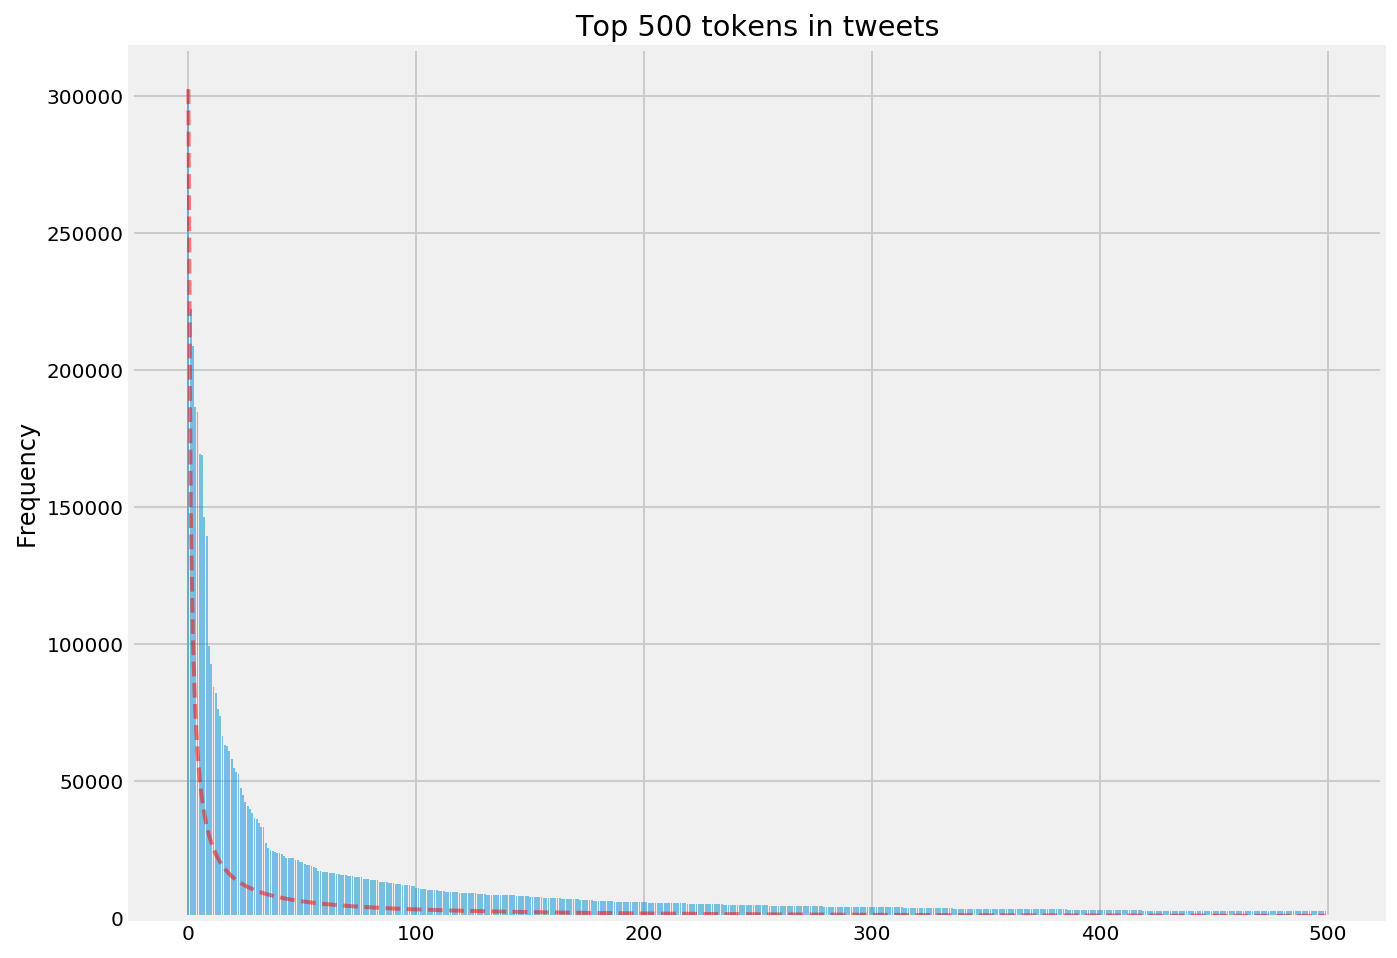

In [21]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

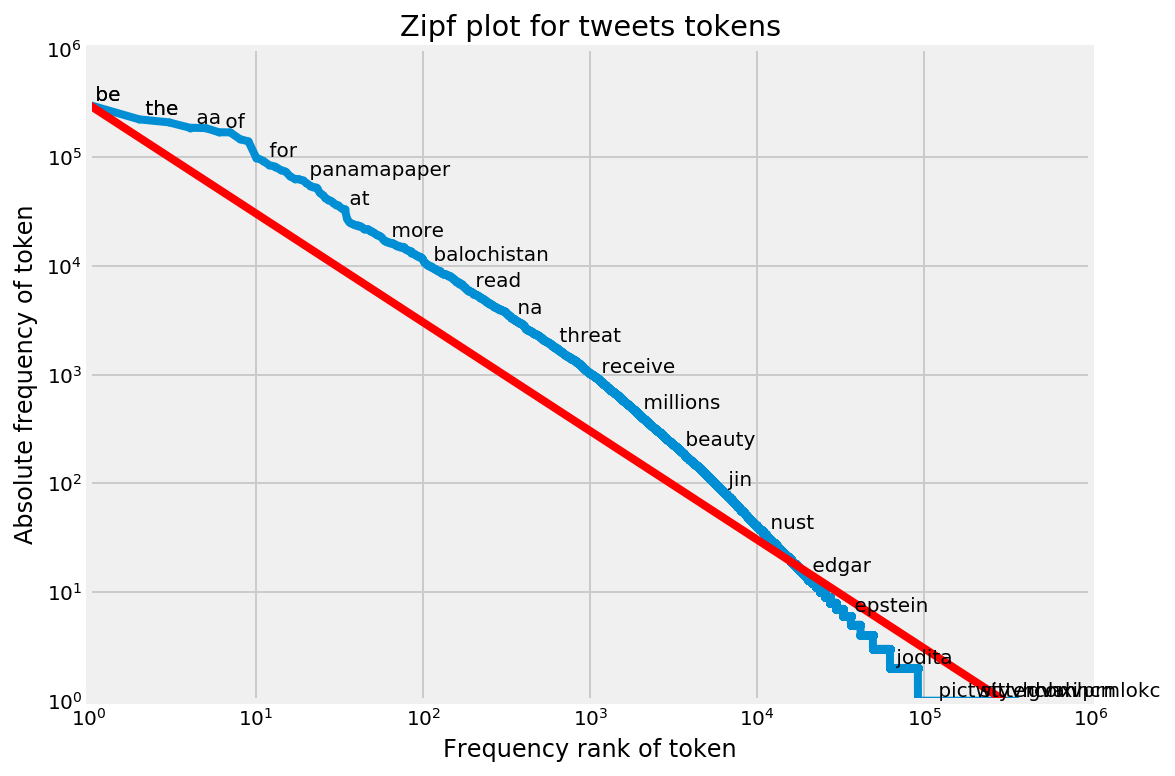

In [22]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)